<a href="https://colab.research.google.com/github/Masarop/Fac_Delta_Machinelearn/blob/master/Analise_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns

In [14]:
url = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-01-21/data/listings.csv.gz"
response = requests.get(url)
bytes_io = io.BytesIO(response.content)
with gzip.open(bytes_io, 'rt') as read_file:
    ds = pd.read_csv(read_file)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ds = ds.drop(['id', 'listing_url','scrape_id', 'last_scraped', 'name','summary', 'space', 'description', 'neighborhood_overview', 'notes','transit','access','interaction','house_rules',
              'thumbnail_url','medium_url', 'picture_url','xl_picture_url','host_id','host_url','host_name', 'host_about','host_thumbnail_url','host_picture_url', 'host_verifications',
              'calendar_last_scraped','first_review','last_review','license','jurisdiction_names', 'cancellation_policy','zipcode', 'square_feet','weekly_price','monthly_price','host_acceptance_rate','neighbourhood_group_cleansed'], axis=1)

In [0]:
def remove_simbolo_monetario(x):
    a =  x[1:] #remove apenas um caracter
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
    return result #retorna os digíto, sem o símbolo

In [0]:
ds["price"] = pd.to_numeric(ds["price"].apply(remove_simbolo_monetario), errors= "ignore")
ds["extra_people"] = pd.to_numeric(ds["extra_people"].apply(remove_simbolo_monetario), errors= "ignore")

ds['bed_type'] = ds.bed_type.astype('category')
ds['bed_type'].cat.categories
ds['bed_type'] = ds['bed_type'].cat.codes

ds['room_type'] = ds.bed_type.astype('category')
ds['room_type'].cat.categories
ds['room_type'] = ds['room_type'].cat.codes

In [0]:
ds['accommodates'] = ds.accommodates.astype('category')
ds['accommodates'].cat.categories
ds['accommodates'] = ds['accommodates'].cat.codes

In [0]:
ds['bathrooms'] = ds.bathrooms.astype('category')
ds['bathrooms'].cat.categories
ds['bathrooms'] = ds['bathrooms'].cat.codes

In [0]:
ds['bedrooms'] = ds.bedrooms.astype('category')
ds['bedrooms'].cat.categories
ds['bedrooms'] = ds['bedrooms'].cat.codes

In [0]:
ds['beds'] = ds.beds.astype('category')
ds['beds'].cat.categories
ds['beds'] = ds['beds'].cat.codes

In [22]:
ds.info()
print(ds.shape)
ds.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34754 entries, 0 to 34753
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   experiences_offered                           34754 non-null  object 
 1   host_since                                    34749 non-null  object 
 2   host_location                                 34577 non-null  object 
 3   host_response_time                            22847 non-null  object 
 4   host_response_rate                            22847 non-null  object 
 5   host_is_superhost                             34749 non-null  object 
 6   host_neighbourhood                            22505 non-null  object 
 7   host_listings_count                           34749 non-null  float64
 8   host_total_listings_count                     34749 non-null  float64
 9   host_has_profile_pic                          34749 non-null 

,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,none,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,100%,t,Copacabana,2.0,2.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,t,Condominium,4,4,2,2,2,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",33200,$0.00,$378.00,2,6300,5,30,5,5,1125,1125,5.0,1125.0,6 weeks ago,t,1,7,37,312,246,26,93.0,10.0,10.0,10.0,10.0,10.0,9.0,f,t,f,f,f,1,1,0,0,2.12
1,none,2010-02-14,"Chicago, Illinois, United States",within an hour,100%,f,Ipanema,0.0,0.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98467,-43.19611,t,Apartment,4,5,4,2,4,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",33600,"$2,098.00",$210.00,6,0,5,30,5,5,30,30,5.0,30.0,3 weeks ago,t,6,12,12,12,89,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,f,f,f,1,1,0,0,1.23
2,none,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,86%,f,Copacabana,3.0,3.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.97712,-43.19045,t,Apartment,4,1,2,1,2,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",15900,"$1,000.00",$250.00,2,4500,7,60,7,7,60,60,7.0,60.0,3 days ago,t,13,16,16,21,237,15,94.0,9.0,10.0,9.0,10.0,10.0,9.0,f,f,f,t,t,3,3,0,0,2.02
3,none,2010-05-31,"Rio de Janeiro, Rio de Janeiro, Brazil",within an hour,100%,t,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,Rio de Janeiro,RJ,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98302,-43.21427,t,Apartment,4,2,2,1,2,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",27300,$0.00,$84.00,2,4200,2,1125,2,5,1125,1125,2.0,1125.0,2 weeks ago,t,0,12,40,130,277,39,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,t,f,f,f,1,1,0,0,2.39
4,none,2010-06-27,"San Carlos de Bariloche, Rio Negro, Argentina",within an hour,100%,f,Ipanema,1.0,1.0,t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Ipanema,Ipanema,Rio de Janeiro,Rio de Janeiro,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.98816,-43.19359,t,Apartment,4,1,3,1,1,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",37800,"$1,049.00",$172.00,2,6300,2,89,2,2,89,89,2.0,89.0,4 months ago,t,2,13,24,108,174,35,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,f,f,t,t,1,1,0,0,2.29


In [23]:
q1 = ds["price"].quantile(0.25)
q3 = ds["price"].quantile(0.75)
IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)
ds = ds[~((ds["price"] < IF) | (ds["price"] > OF))]
ds.shape

(31471, 69)

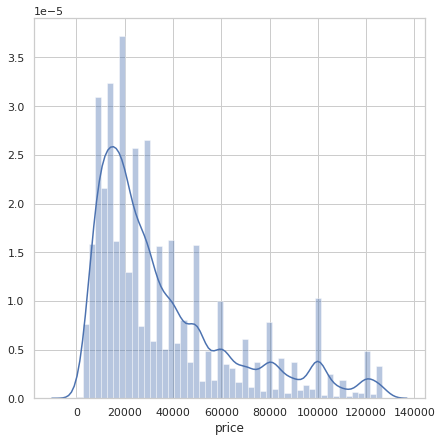

In [24]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["price"])

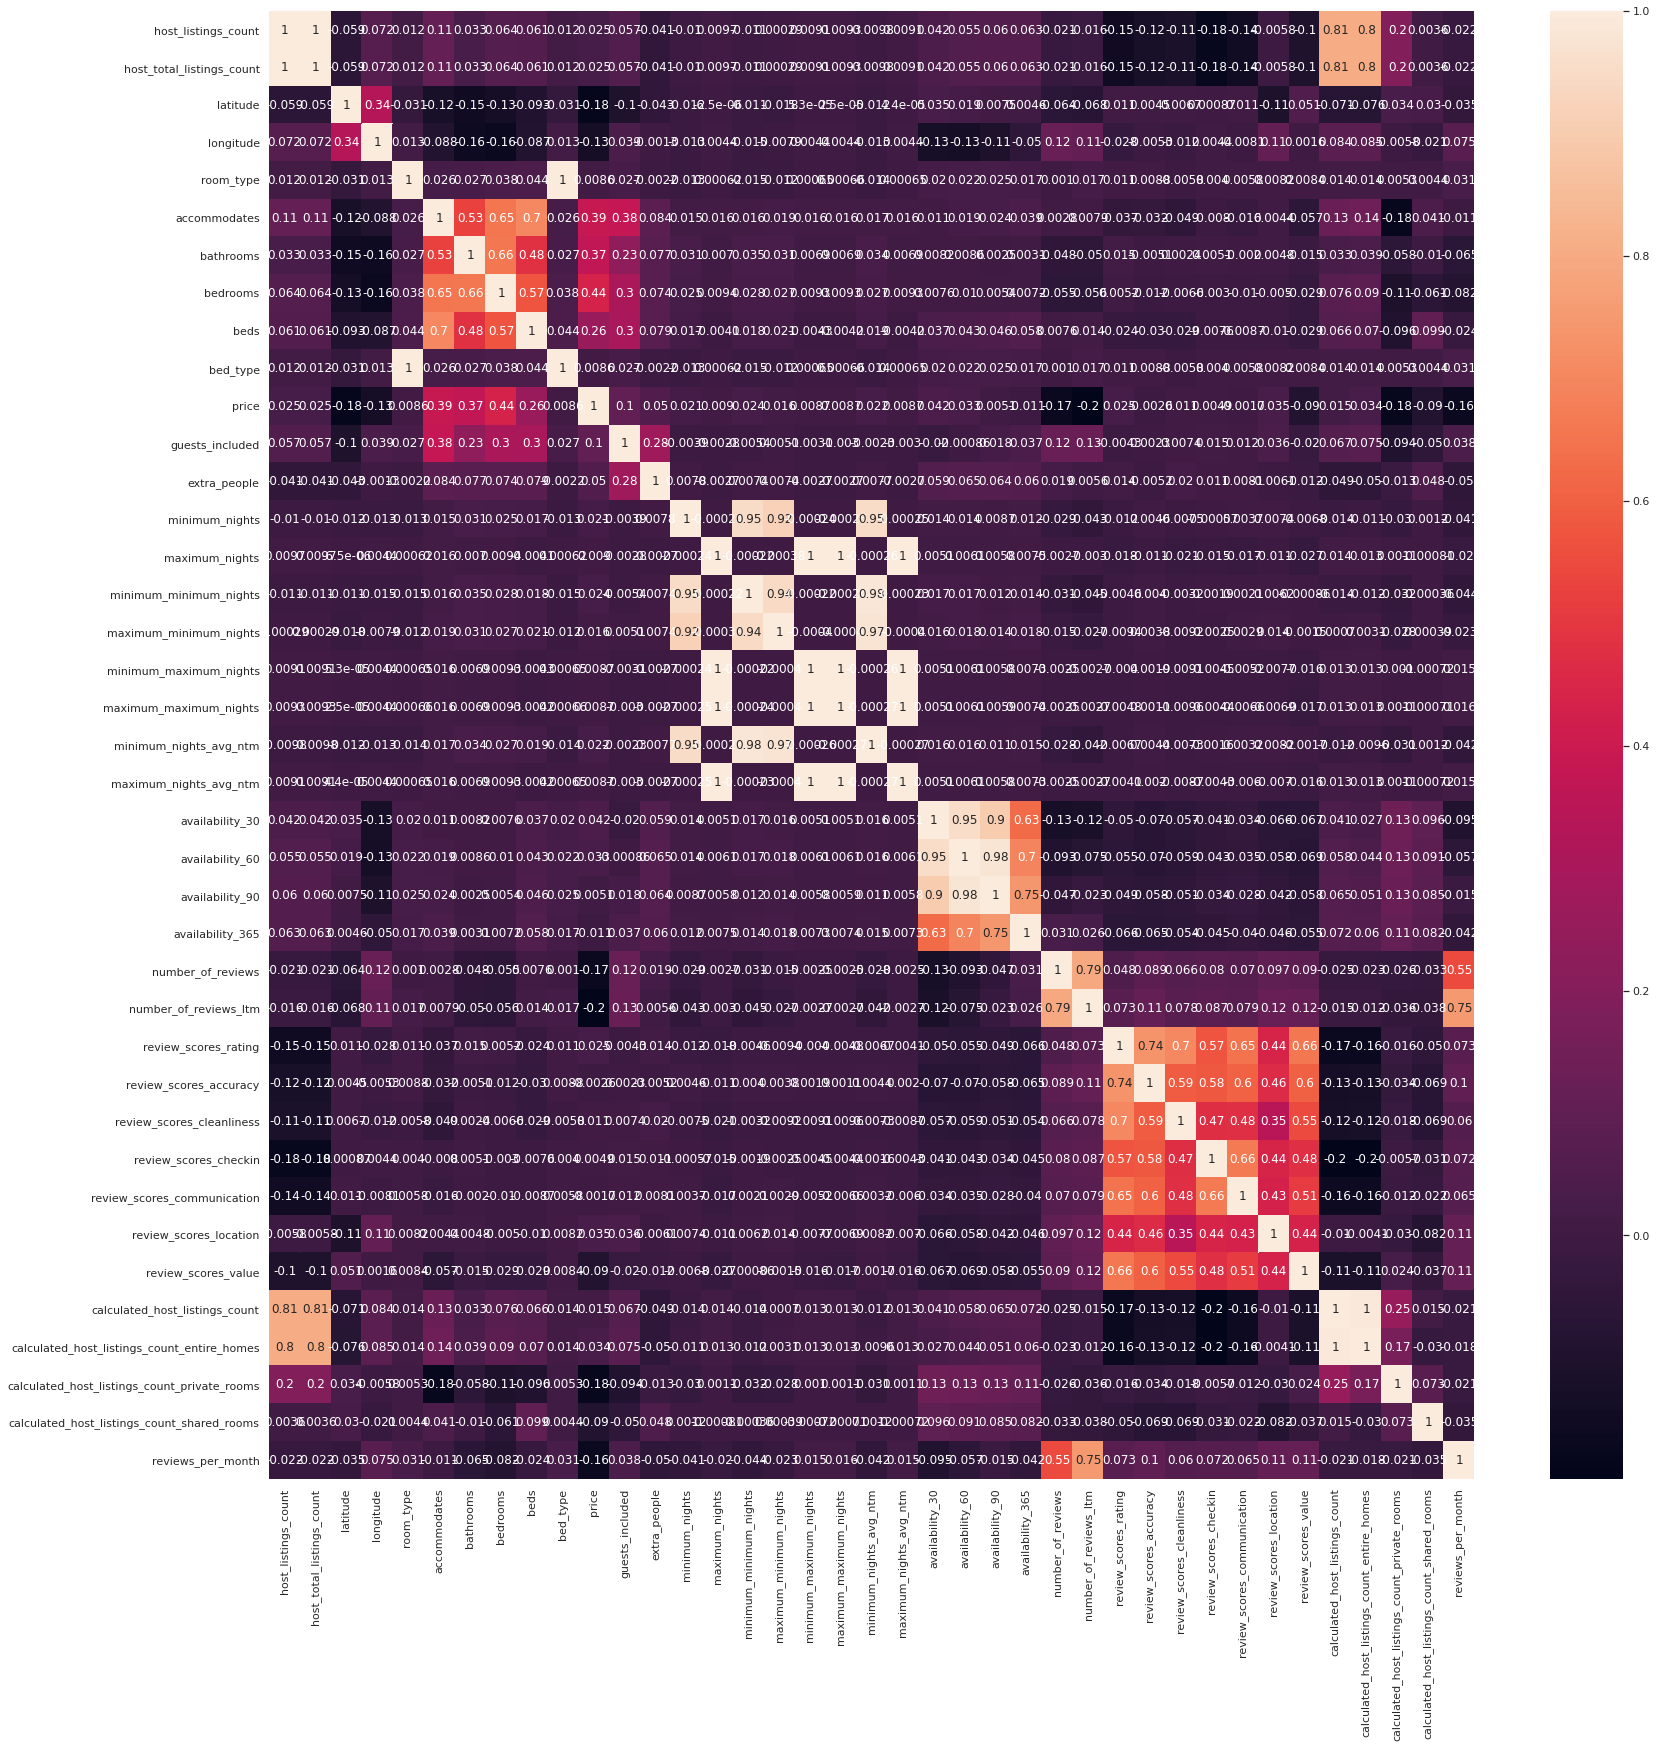

In [25]:
import seaborn as sns
plt.figure(figsize=(27,27))
sns.heatmap(ds.corr(), annot=True)

In [0]:
x = ds[['accommodates', 'bathrooms','bedrooms','beds', 'room_type']]
y = ds["price"]
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
rf_tree = RandomForestRegressor(n_estimators = 1500, verbose=1, criterion='mse')

#treina

In [31]:
print("X_train shape: {}".format(x_train.shape)) #
print("y_train shape: {}".format(y_train.shape)) #
print("X_test shape: {}".format(x_test.shape)) #
print("y_test shape: {}".format(y_test.shape)) 
#saida do treino

X_train shape: (22029, 5)
y_train shape: (22029,)
X_test shape: (9442, 5)
y_test shape: (9442,)


In [34]:
rf_tree.fit(x_train, y_train)
pred_tree = rf_tree.predict(x_test)
print("Test set predictions: {}".format(pred_tree))
#prediz

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set predictions: [22253.06044274 47783.0126275  56849.73755304 ... 51643.34423505
 51841.12585859 30786.69366015]


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    1.6s finished


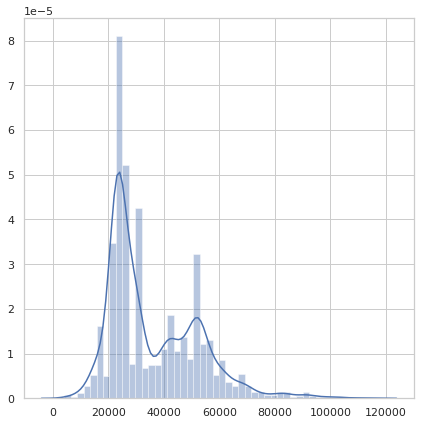

In [35]:
#grafico da Predição
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(pred_tree)